# Histograms#

In this section we will study openCV histograms. Histograms are a useful way of seeing how colors pixels are distributed in a picture. We study histograms to understand contrast, brightness and intensity distribution.

## GrayScale Histograms

We will first look at histograms in the grayscale images

In [1]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

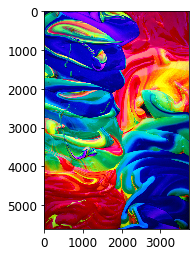

In [2]:
image=cv2.imread("images/rainbow_art.jpg")
plt.imshow(fixColor(image))

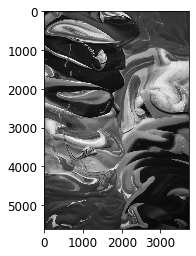

In [3]:
#Convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(image))

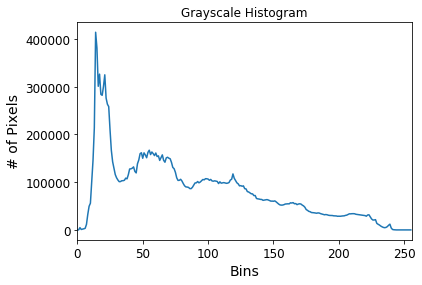

In [4]:
#cv2.calcHist takes the following parameters image, number of channels, mask, # of bins, value of bins array
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

## Color Histograms

We will now look at color histograms. The image will be split along its channels and histograms will be drawn. This enables us to answer questions like how many pixels of blue have strength 30 etc.

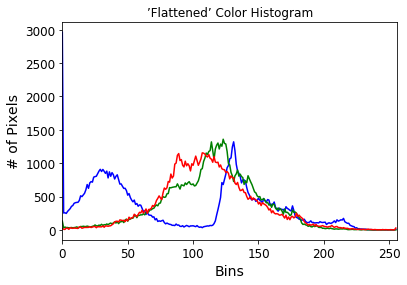

In [5]:
image=cv2.imread("images/rainbow.jpg")
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("’Flattened’ Color Histogram") 
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

## MultiDimensional Histograms

Multidimensional histograms enable us to answer questions like how many pixels have red value of 30 and blue value of
50. 

### 2-D Dimension analysis

2D histogram shape: (32, 32), with 1024 values


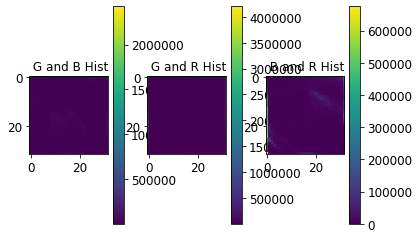

In [12]:
image=cv2.imread("images/rainbow_art.jpg")
chans = cv2.split(image)
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title(" G and B Hist")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title(" G and R Hist")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title(" B and R Hist")
plt.colorbar(p)

print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))


In [13]:
from mpl_toolkits.mplot3d import Axes3D
size=5000
bins=8

In [14]:
hist = cv2.calcHist([image], [0, 1, 2],None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

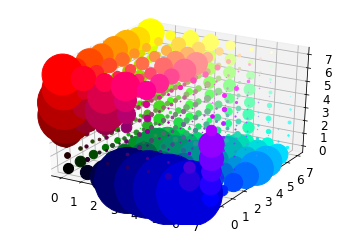

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d") 
ratio = size / np.max(hist)
for (x, plane) in enumerate(hist):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row): 
            if hist[x][y][z] > 0.0:
                siz = ratio * hist[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s = siz, facecolors = rgb)
plt.show()

### Histogram Equalization

Histogram equalization improves the contrast of an image by “stretching” the distribution of pixels. Consider a his- togram with a large peak at the center of it. Applying his- togram equalization will stretch the peak out towards the corner of the image, thus improving the global contrast of the image. Histogram equalization is applied to grayscale images.

It tends to produce unrealistic effects in photographs; however, it is normally useful when enhancing the contrast of medical or satellite images.


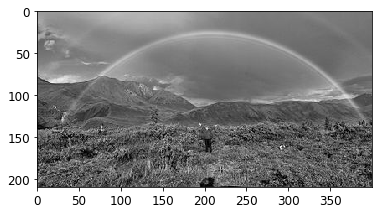

In [31]:
image=cv2.imread("images/rainbow.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(image))

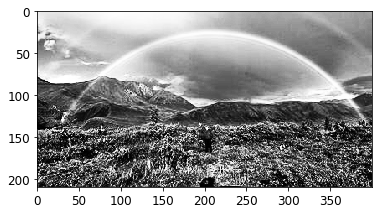

In [32]:
eq = cv2.equalizeHist(image)
plt.imshow(fixColor(eq))

We can plot a histogram of the equalised image to and compare the impact with the original

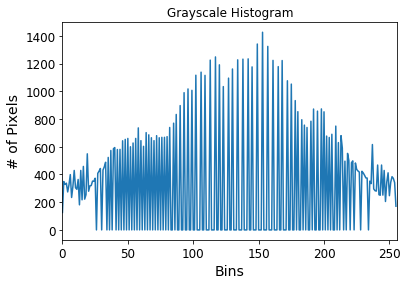

In [33]:
hist = cv2.calcHist([eq], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### Histograms with Masks

With masks you can see the histogram of particular region of interest only.

In [34]:
image=cv2.imread("images/rainbow.jpg")
mask = np.zeros(image.shape[:2], dtype = "uint8")

In [35]:
def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])


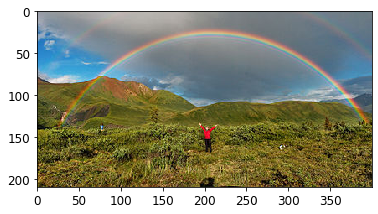

In [38]:
plt.imshow(fixColor(image))

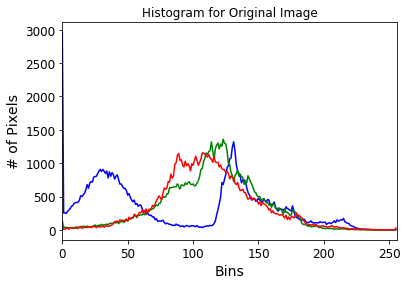

In [37]:
plot_histogram(image, "Histogram for Original Image")

Lets create the mask now

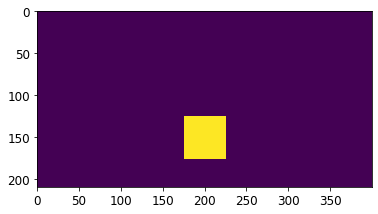

In [52]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
#cv2.rectangle(mask, (50, 75), (25, 50), 255, -1)
#cv2.rectangle(mask, (25, 150), (50, 175), 255, -1)
cv2.rectangle(mask, (175, 125), (225, 175), 255, -1)
plt.imshow(mask)


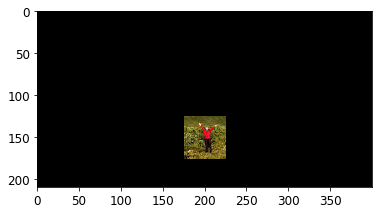

In [53]:
masked = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(fixColor(masked))

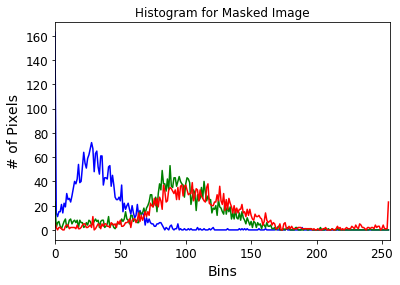

In [54]:
plot_histogram(image, "Histogram for Masked Image", mask = mask)
